# Programming Project 6
## 605.649 Introduction to Machine Learning
## Ricca Callis

## Directions

For the sixth and final programming assignment, you will implement a reinforcement learner and apply it
to the racetrack problem. The racetrack problem is a popular control problem, often used in reinforcement
learning assignments. The goal is to control the movement of a race car along a pre-defined racetrack. You
want your race car to get from the starting line to the finish line in a minimum amount of time. In this
version of the problem, your agent will be the only racer on the track, so it is more like a time trial than a
full competitive race.

More formally, at each time step, the state of the agent can be encoded in four variables: $\x_{t} and y_{t}$ are the *x* and *y* coordinates corresponding to the location of the car at time step *t* (we treat the racetrack as being layed out on a Cartesian grid). The variables $\x_{t} and y_{t}$ represent the *x* and *y* components of the car’s velocity at time *t*. The control variables for the car are ax and ay, which represent the *x* and *y* components of an acceleration vector to be applied at the current time step. The system is governed by an approximation of the standard laws of kinematics:

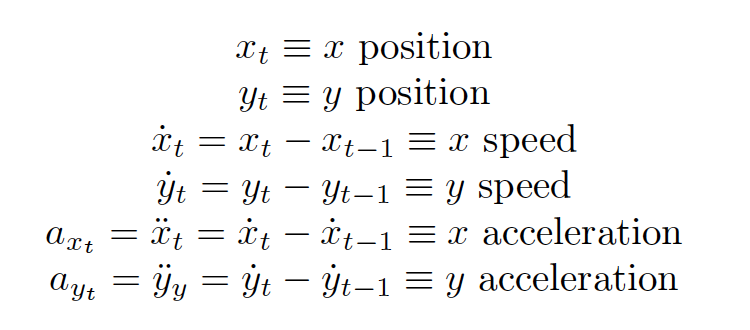

At any given time step, your car only has active control over the values of ax and ay and must use these
control variables to influence the car’s state. This essentially gives you the ability to accelerate, decelerate, and turn. There is a further restriction that the set of values that may be assigned to a control variable is -1, 0, and 1. That is,

$$a_{{x,y}} \in{-1,0,1}$$

The velocity of your car at any given time is limited to ($x_{t}; y_{t}) \in [+-5;+-5]. Any attempt to accelerate or decelerate beyond these limits will be ignored.

As an example, if at time *t* = 0 your car is at location (2,2) with velocity (1, 0), it is essentially moving
towards the east. If you apply an acceleration of (1, 1), then at timestep *t* = 1 your position will be (4, 3)
and your velocity will be (2, 1). At each time step, your acceleration is applied to your velocity before your
position is updated. Strictly speaking, this is not a good model of Newtonian physics, but we’re dealing with
integer position and velocity values, so some simplifying abstractions need to be made.

If this were the extent of the problem, it would be quite easy to solve for any given track, so to make
things a bit more interesting, we are going add in a small amount of non-determinism. To do this, we assign
a probability to each attempted action for each possible outcome. For this assignment, we specify that for
any attempt to accelerate, there is a 20% chance that attempt will simply fail, and the velocity will remain
unchanged at the next timestep. Thus, at each timestep, the probability of accelerating as specified is 80%
and the probability of having no acceleration is 20%.

In this problem, there is an additional requirement that you stay on the track; crashing into the wall is
bad. This means that you need to write code capable of detecting the vehicle intersecting with the boundary
of the track. One common algorithm that can be used for this comes from computer graphics and is called
“Bresenham’s Algorithm.” You can find information on this algorithm at https://www.geeksforgeeks.
org/bresenhams-line-generation-algorithm/

You will experiment with two different versions of how “bad” it is to crash. The first variant says that, if
the car crashes into a wall, it is placed at the nearest position on the track to the place where it crashed, and its velocity is set to (0, 0). The second, harsher variant says that when a car crashes, its position is set back to the original starting position, as well as zeroing its velocity. Essentially, in this latter case if you crash, you have to start over from the beginning. You should implement both variants in your program so that you can experiment with what effects they have on the strategies your car learns. Since you have a limited time to run experiments, however, you are only expected to do a side by side comparison of the two definitions
of a “crash” on the R shaped track (in the file R-track.txt). For the other tracks, use the version where
crashing stops the car but leaves it in the location it crashed.

The cost function is 1 for each move, except when you reach the finish line. The finish line locations are
absorbing states with cost 0. Since you are attempting to minimize cost, this translates to attempting to
complete the race in as few time steps as possible. You do not need to stop on a finish state. It is sufficient
to cross the finish line, so this means the “wall” behind the finish line really isn’t a wall.

### Here are the specific steps that need to be followed:

 Implement the racetrack problem as described above, including a racing simulator that takes a track
specification (described below).

 Implement the Value Iteration algorithm and both the Q-learning and SARSA algorithm, and apply
them to the racetrack problem.

 Test your algorithms on the three provided tracks in the data files described below. The files are
named L-track.txt, O-track.txt, and R-track.txt and can be found within Blackboard. Test
your algorithms on each of the two crash scenarios. It is up to you to determine appropriate design
parameters such as learning rate, discount factor, exploration strategy, etc.

 Use the data files for the tracks provided, represented in ASCII. The first line lists the size of the track
as an comma delimited pair <rows, cols>. The rest of the file is a grid of the specified dimensions with
one character at each point. The legend for the files is:

    – S – This square is on the starting line.
    – F – This square is on the finish line.
    – . – This square is open racetrack.
    – # – This square is off the racetrack (i.e., a wall).
    
    As a simple example:    5,5
                            FF###
                            ..###
                            ..###
                            ....S
                            ....S
                            
 Run experiments, keeping track of the number of training iterations and the number of steps the race
car needs to take before finding the finish line. Make sure you run at least 10 experiments for each
track (preferably more) to get reasonable statistics. Also generate data so you can plot learning curves.

 Write a very brief paper that incorporates the following elements, summarizing the results of your
experiments. Your paper is required to be at least 5 pages and no more than 10 pages using the JMLR
format You can find templates for this format at http://www.jmlr.org/format/format.html. The
format is also available within Overleaf.

1. Title and author name

2. Problem statement, including hypothesis, projecting how you expect each algorithm to perform

3. Brief description of your experimental approach, including any assumptions made with your algorithms

4. Presentation of the results of your experiments

5. A discussion of the behavior of your algorithms, combined with any conclusions you can draw

6. Summary

7. References (Only required if you use a resource other than the course content.)


 Submit your fully documented code with sample runs, results of the runs of each algorithm, and your
paper.

 For the video, the following constitute minimal requirements that must be satisfied:

        – The video is to be no longer than 5 minutes long.
        
        – The video should be provided in mp4 format. Alternatively, it can be uploaded to a streaming
        service such as YouTube with a link provided.
        
        – Fast forwarding is permitted through long computational cycles. Fast forwarding is not permitted
        whenever there is a voice-over or when results are being presented.
        
        – Be sure to provide verbal commentary or explanation on all of the elements you are demonstrating
        
        – Demonstrate one sweep of the value iteration algorithm, showing the “V ” values being updated
        for the track.
        
        – Demonstrate the “Q” values being updated along one sequence generated during Q-learning
        
        – Demonstrate the “Q” values being updated along one sequence generated during SARSA
        
        – Demonstrate the exploration function of your learning algorithm, showing cases where both a
        current optimal action is selected and where a random action is selected. Note that this is
        different from demonstrating the nondeterminism of the simulator.

        – Demonstrate the generation of a path of hstate; action; statei triples of your vehicle at the end of
        learning on one track for each of the three algorithms. Highlight a point where the nondeterministic
        response to an action occurs along that path.

        – Demonstrate the “restart” behavior for each of the two scenarios when the car collides with the
        wall. If you wish, this can be done as part of the path generation demonstration above.

        – Demonstrate your clipping algorithm for detecting when a car collides or intersects with the
        boundary of the track. If you wish, this can be done as part of demonstrating the “restart”
        behavior, since restarting involves responding to a collision.


Your grade will be broken down as follows:

 Code structure – 10%

 Code documentation/commenting – 10%

 Proper functioning of your code, as illustrated by a 5 minute video – 30%

 Summary paper – 50%

# Reinforcement Learning

**Overview**

Reinforcement learning is an area of machine learning that is concerned with how an agent should take actions in an environment so that it can maximize its cumulative rewards. Unlike most machine learning techniques, the learner is not told which action it should take but instead must discover which action maximizes its cumulative reward by trying them. Trial-and-error search and delayed rewards are the two important distinguishing features of reinforcement learning.

## The Racetrack Problem

**Overview**

The racetrack problem is a standard control problem. The goal is to control the movement of a race car along a pre-determined racetrack so that the racer can get to the finish line from starting line in minimum amount of time. The goal is to go as fast as possible, but not so fast as to run off the track. 

The basic problem in reinforcement learning is a Markov Decision Process (MDP). In an MDP, the optimal
decision depends only on the current state of the agent. At each time step, after an action is taken, a reward
is given.

Specifcally, in this paper, the agent will be a racecar on a racetrack with several different elements:
     A set of starting locations for the car.
     A set of finish line locations for the car.
     A set of out-of-bounds markers for the car.

The problem of solving the policy involves determining the optimal acceleration at each location of the
racetrack.

Additionally, there is an element of randomness involved - at each step, after an acceleration action is
chosen, there is only an 80% chance of it happening as expected.

There are 3 tracks included in the problem, each with increasing size and difficulty:

    1. L-Track: 11 rows, 37 columns
    
    2. O-Track: 25 rows, 25 columns
    
    3. R-Track: 28 rows, 30 columns
    
Each track is represented as a discrete grid, with the following characters in each grid point:

    - S : The starting line
    
    - F : The finish line
    
    - . : Open racetrack
    
    - # : Off the racetrack (i.e., a wall)

Each track has two variants, each handling off-track cars differently:

    1. Harsh Variant: If the car hits the out-of-bounds marker, it is returned to the start location with       
    velocity 0.
    
    2. Simpler Variant: If the car hits the out-of-bounds marker, it is returned to the last location with 
    velocity of 0.

**Details**

In our simplified racetrack, the car is at one of a discrete set of grid positions, the cells in the diagram. The velocity is also discrete, a number of grid cells moved horizontally and vertically per time step. The actions are increments to the velocity components. Each may be changed by +1, −1, or 0 in each step, for a total of nine (3 x 3) actions. Both velocity components are restricted to be nonnegative and less than 5, and they cannot both be zero except at the starting line. 

Each episode begins in one of the randomly selected start states with both velocity components zero and ends when the car crosses the finish line. The rewards are −1 for each step until the car crosses the finish line. If the car hits the track boundary, it is moved back to a random position on the starting line, both velocity components are reduced to zero, and the episode continues. Before updating the car’s location at each time step, we check to see if the projected path of the car intersects the track boundary. If it intersects the finish line, the episode ends; if it intersects anywhere else, the car is considered to have hit the track boundary and is sent back to the starting line. To make the task more challenging,there is a probability 0.1 at each time step the velocity increments are both zero, independently of the intended increments.

## Notations

S: The set of states in the environment

A: The set of actions that can be executed by the agent

Policy $\pi(s)$ : A mapping from state s to action a. Tells the agent what to do at each state in the environment

Q(s,a): A mapping that dictates the expected reward for choosing action a from state s. 

$\gamma$: The discount rate, or the amount by which a future reward is discounted. A reward in *t* iterations gets discounted by a factor of $\gamma^{t}$

*t*: Time


## Value Iteration

**Overview**

Attempts to find $Q^*(s,a)$ by iteratively updating each entry in Q as the sum of the current value and the discounted value from executing each state.

**Pseudocode**
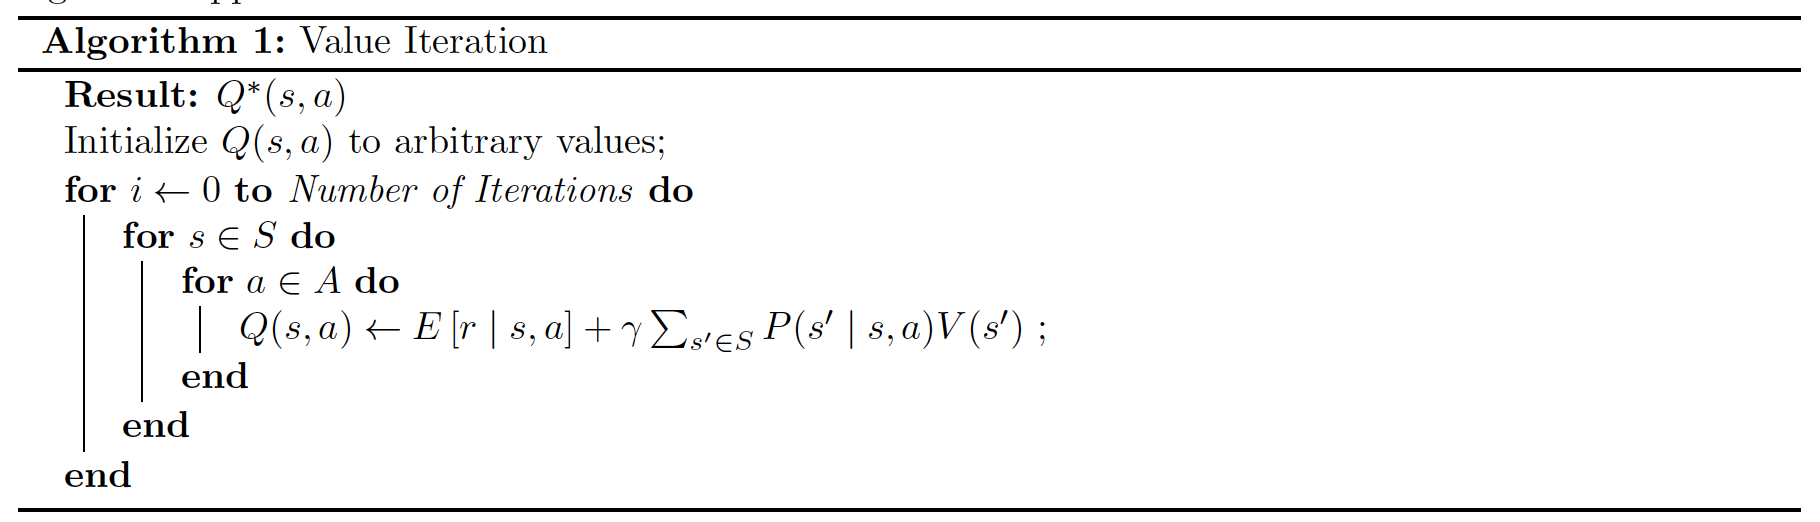

## Q-Learning

**Overview**

Uses a greedy action selection to explore the space, while estimating Q(s,a) as a mix between it's current value and the approximate additional reward that would come from taking action a, with the policy at the state, s'. Uses episodes, in which the agent makes a sequence of decisions from the beginning to the end, updating  the policy along the way.

**Pseudocode**

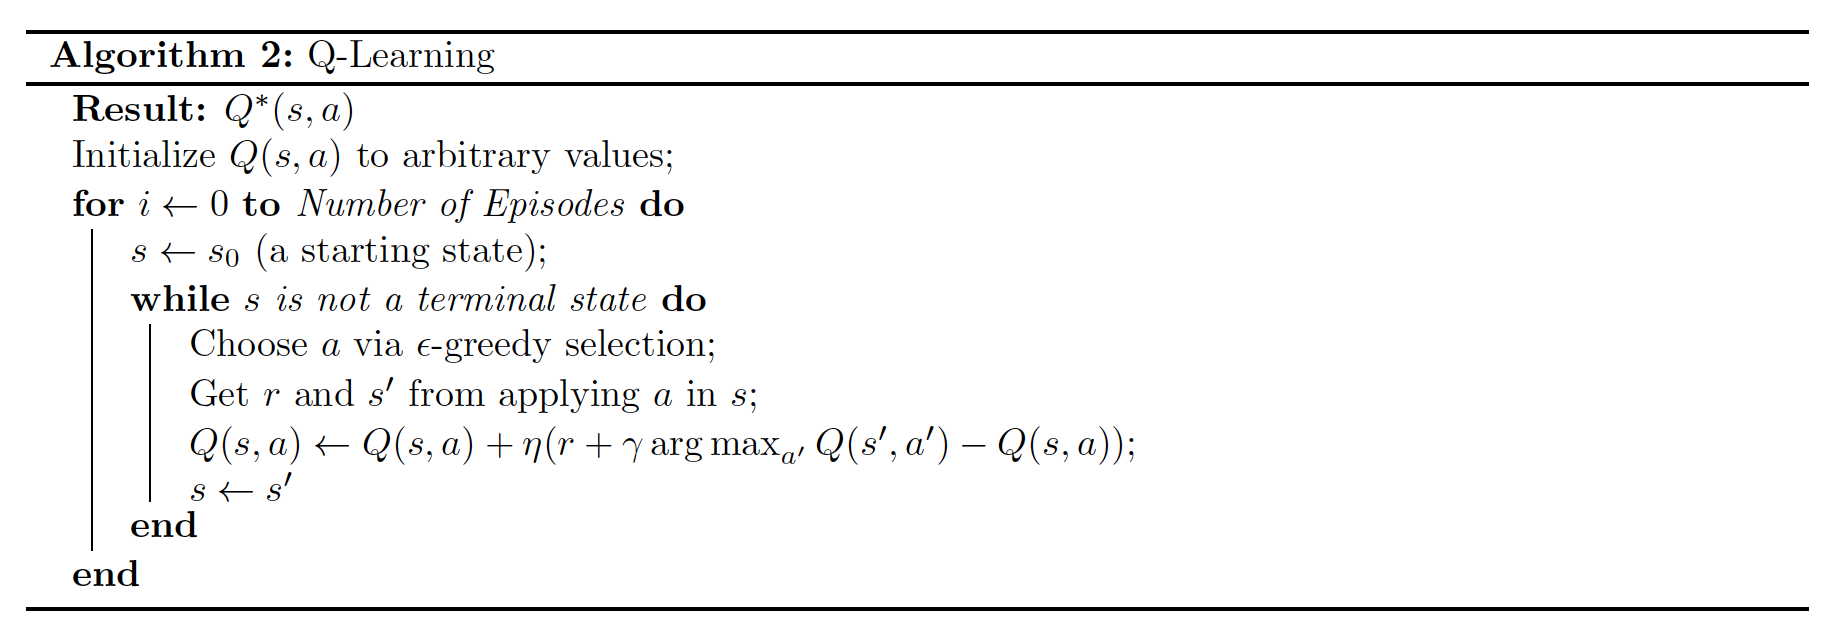

## SARSA

**Overview**

Online policy learning algorithmn. Policy is used to determine not only the immediate action a, but also the succeeding one, a'.

**Pseudocode**
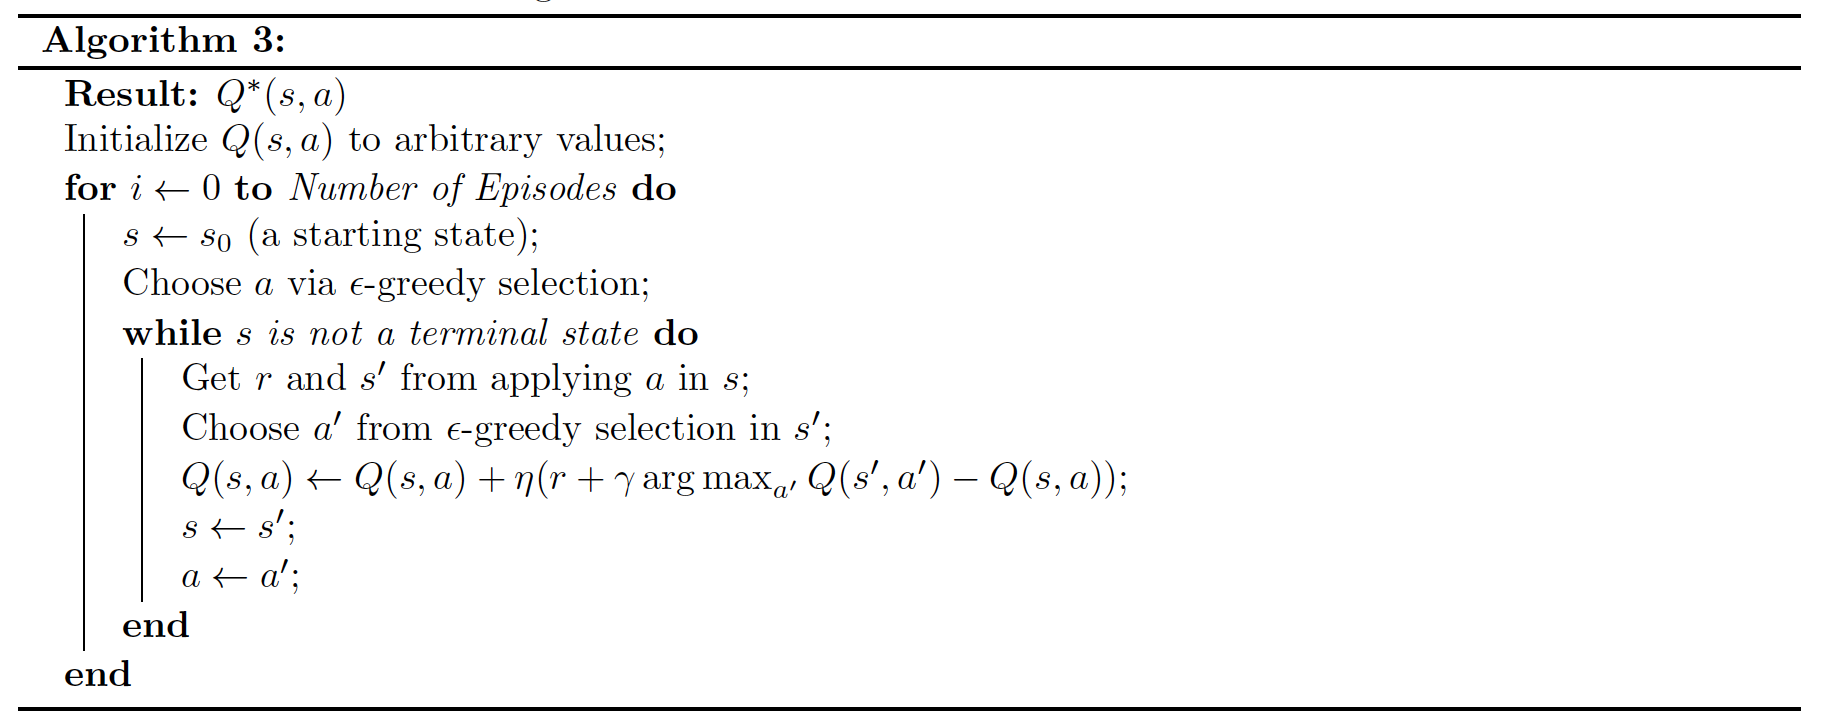

In [1]:
# Author: Ricca Callis
# EN 605.649 Introduction to Machine Learning
# Programming Project #6
# Date Created: 8/17/2020
# File name: Programming Assignment 6 - Callis.ipynb
# Python Version: 3.7.5
# Jupyter Notebook: 6.0.1
# Description: Implementation of Reinforcement Learners to solve the Racetrack problem. 

"""
Environment: Simulated racetrack, represented as a discrete set of grid positions.
    L-Track: L-Shaped track with 11 rows and 37 columns
    O-Track: O-Shaped track with 25 rows and 25 columns
    R-Track: R-shaped track with 28 rows and 30 columns
    Each track is represented as a discrete grid, where each grid space has one of the following characters:
        1. S : Starting line
        2. F : Finishing line
        3. . : Open racetrack
        4. # : Off the racetrack (i.e., a wall)

Agent: Racecar
    Includes several different elements:
        1. A set of starting locations for the car
        2. A set of finish line locations for the car
        3. A set of out-of-bounds markers for the car
    Speed of Car: Distance traveled over time (has no direction component)
        Speed = (distrance traveled) / (time interval)
    Velocity of Car: Speed & Direction of Car traveled over time (change in position over time)
        Velocity = (delta x / delta t) = (x_final - x_initial) / (t_finial - t_initial)
    Acceleration of Car: The rate at which velocity changes 
        Acceleration = (delta v / delta t) = (v_final - v_initial) / (t_final - t_initial)

Goal: Move the car from the start line to the finish line as fast as possible, without going off-track
We will solve the policy by determining the optimal acceleration at each location of the racetrack.

Randomness: At Each step, after an acceleration action is chosen, there is only an 80% chance of it 
happening as expected.

Learners:

     Value Iteration: Calculates an optimal policy so that the agent can choose actions based on that policy. 
     Policy is computed by calculating the utility of each state and then using the state utilities to select
     an optimal action in each state. Uses the Bellman equation to calculate the utility of being in a state.
     Attempts to find Q*(s,a) by iteratively updating each entry in Q as the sum of the current value and the
     discounted value from executing each state. Thus, value iteration updates each state-action pair on each 
     iteration. 
     
     Q-Learning: An Active reinforcement learner which decides what action to take in each state. Q-Learner
     compares the expected utility of the available actions and hence does not require a model of the environment.
     Uses a greedy action selection to explore the space, while estimating Q(s,a) as a mix between it's current 
     value and the approximate additional reward that would come from taking action a, with the policy at the new
     state, s'. Uses episodes, in which the agent makes a sequence of decisions from the beginning to the end,
     updating  the policy along the way.The policy only determines a, and the ensuring reward is estimated by 
     the approximation of the optimal choice state Q(s'a). However, the agent does not necessarily make that optimal choice.
     
     SARSA (State-Action-Reward-State-Action): Online policy learning algorithmn. Policy is used to determine 
     not only the immediate action a, but also the succeeding one, a'.
"""

"""
Required Data Sets:
    L-track.txt
    O-track.txt
    R-track.txt
""" 


'\nRequired Data Sets:\n    L-track.txt\n    O-track.txt\n    R-track.txt\n'

In [2]:
from platform import python_version
print ( python_version() )

3.7.5


In [22]:
# Common standard libraries
import datetime
import time
import os
# Common external libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import sklearn #scikit-learn
import sklearn
from sklearn.model_selection import train_test_split 
import random #as py_random
#import numpy.random as np_random
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import mode
from toolz import pipe # pass info from one process to another (one-way communication)
from toolz import dicttoolz
from typing import Callable, Dict, Union, List
from collections import Counter, OrderedDict
import logging
import multiprocessing
import operator
import sys
import copy
from typing import Callable, Dict, Union
from functools import partial
from itertools import product
import warnings
import io
import requests as r
from joblib import Parallel, delayed
import tqdm
import logging
import json

#logging.basicConfig ( filename ='logfile.txt' )
logging.basicConfig()
logging.root.setLevel ( logging.INFO )
logger = logging.getLogger ( __name__ )

In [4]:
% matplotlib inline

UsageError: Line magic function `%` not found.


In [5]:
# Check current directory
currentDirectory = os.getcwd()
print ( currentDirectory )

/Users/riccacallis/Desktop/JHU/Data Science/Introduction to Machine Learning/Programming Project 6


In [6]:
# Input data files are available in the ".../input/" directory
# Change the Current working Directory
os.chdir ( '/Users/riccacallis/Desktop/JHU/Data Science/Introduction to Machine Learning/Programming Project 6/input' )

# Get Current working Directory
currentDirectory = os.getcwd()
print ( currentDirectory )

/Users/riccacallis/Desktop/JHU/Data Science/Introduction to Machine Learning/Programming Project 6/input


In [7]:
# List files in input directory
from subprocess import check_output
print ( check_output ( [ "ls", "../input" ] ).decode ( "utf8" ) )

L-track.txt
O-track.txt
R-track.txt



In [25]:
# Define Characters on Racetrack's GridSpace

WALL_TOKEN = "#"
FINISH_LINE_TOKEN = "F"
STARTING_LINE_TOKEN = "S"

FINISH_STATUS = "FINISHED"
REVERTED_STATUS = "REVERTED"
MOVED_STATUS = "MOVED"
FINISHED_TOKEN = "FINISHED"
MOVING_TOKEN = "MOVING"


# Define the Racecar (i.e., the agent)

'''''
Class: Car
    - Contains the operations of the racecar. Note that the car will race 
    around a track represented as a Cartesian grid (with X, Y coordinates indicating it's location)

Functions:
    - __init__: Initializes the Car class.
    - set_acceleration: Sets the acceleration of the car.
    - limit_speed: Limits the maximum speed to + or - 5.
    - move_car: Moves the racecar a grid space (or step) along the racetrack.
    - revert_step:If the car goes off-track (i.e, hits a wall), revert the step (i.e., undo the last step) and 
    set speed to zero.
    - back_to_start: If the car goes off-track (i.e., hits a wall), this method will send the car back to the starting 
    place.
    - get_location: Obtains the current location tuple (i.e., the current x,y coordinate of the car on 
    the racetrack).
    - get_last_location: Obtains the previous location (i.e., x,y coordinate) of the car on the grid racetrack.
    - get_actions: Obtains all possible actions.
'''''

class Car:
    """
    Basic class to handle the operations of the racecar.
    """

    def __init__( self, x_coordinate, y_coordinate, x_speed = 0, y_speed = 0 ):
        """
        Method which initializes the racecar.
            Parameters
                x_coordinate: Indicates the starting position X of the car (i.e., the x 
                coordinate from a (x,y) pair on a discrete Cartesian grid). Type: Integer.
                y_coordinate: Indicates the starting position Y of the car.(i.e., the x 
                coordinate from a (x,y) pair on a discrete Cartesian grid). Type: Integer.
                x_speed: Indicates the starting x velocity of the car. Type: Integer.
                y_speed: Indicates the starting y velocity of the car. Type: Integer.
            Returns: N/A
        """
        # Set the starting point as an (x,y) location on a discrete Cartesian grid
        self.starting_point = ( x_coordinate, y_coordinate )

        # Initialize coordinate variables
        self.x_coordinate = x_coordinate
        self.y_coordinate = y_coordinate

        # Initialize variable to track last coordinate location
        # Set variables to 0
        self.last_x = 0
        self.last_y = 0

        # Initialize speed variables
        # Speed = delta distance / delta time
        self.x_speed = x_speed
        self.y_speed = y_speed

        # Initialize acceleration variables
        # Acceleration = delta velocity / delta time
        self.x_acceleration = 0
        self.y_acceleration = 0
        
    # End __init__()

    def set_acceleration ( self, x_acceleration, y_acceleration):
        """
        Method which sets the accelration of the car
            Parameters:
                x_acceleration: Acceleration of x coordinate
                y_acceleration: Acceleration of y coordinate
            Return: N/A 
        """
        self.x_acceleration = x_acceleration
        self.y_acceleration = y_acceleration
        
    # End set_acceleration()

    def limit_speed ( self ):
        """
        Method which limits the speed to a maximum of + or - 5.
        """
        
        # If x coordinate speed calculation is greater than 5
        if self.x_speed > 5:
            self.x_speed = 5 # Assign x coordinate speed to 5 (the max)
            # End if x_speed > 5
        # If y coordinate speed calculation is greater than 5
        if self.y_speed > 5:
            self.y_speed = 5 # Assign y coordinate speed to 5 (the max)
            # End if y_speed > 5

        # If the x coordinate speed is less than -5
        if self.x_speed < -5:
            self.x_speed = -5 # Assign x coordinate speed to -5 (the min)
        # If y coordinate speed is less than -5
        if self.y_speed < -5:
            self.y_speed = -5 # Assign y coordinate speed to -5 (the min)
            
    # End limit_speed()

    def move_car ( self ):
        """
        Method which moves the racecar a grid space (or step) along the racetrack.
        """
        # Randomly choose if acceleration will be random
        accel_succeeds = np.random.uniform ( 0, 1, size = 2 ) > 0.2

        # Set the speed based on the acceleration if success chosen.
        self.x_speed += self.x_acceleration if accel_succeeds [ 0 ] else 0
        self.y_speed += self.y_acceleration if accel_succeeds [ 1 ] else 0

        # Ensure the speed is less than 5
        self.limit_speed()

        # Track the previous state so we can revert to it if we need to 
        # (i.e., if we use harsh variant & hit a wall)
        self.last_x = self.x_coordinate
        self.last_y = self.y_coordinate

        # Take the step/move the car one grid space
        self.x_coordinate += self.x_speed
        self.y_coordinate += self.y_speed
        
    # End move_car()

    def revert_step ( self ):
        """
        If the car goes off-track (i.e, hits a wall), this method will revert the step (i.e., undo the 
        last step) and set the speed to zero.
        """
        # Reset speed to 0
        self.x_speed = 0
        self.y_speed = 0
        
        # Return car to last coordinate position on grid
        self.x_coordinate = self.last_x
        self.y_coordinate = self.last_y
    
    # End revert_step()

    def back_to_start ( self ):
        """
        If the car goes off-track (i.e., hits a wall), this method will send the car back to the starting 
        place.
        """
        # Return car to starting point (i.e., reset x,y coordinates to S)
        self.x_coordinate, self.y_coordinate = self.starting_point
        
        # Reset speed to 0
        self.x_speed = 0
        self.y_speed = 0
        
    # End back_to_start()

    def get_location ( self ):
        """
        Method which obtains the current location tuple (i.e., the current x,y coordinate of the car on 
        the racetrack).
            Parameters:
                self
            Returns: The (x,y) coordinate of the car on the grid racetrack.
                x_coordinate: Indicates the x coordinate position of the car (i.e., the x 
                coordinate from a (x,y) pair on a discrete Cartesian grid). Type: Integer. 
                y_coordinate: Indicates the y coordinate position of the car (i.e., the y 
                coordinate from a (x,y) pair on a discrete Cartesian grid). Type: Integer.
        """
        return (self.x_coordinate, self.y_coordinate)

    def get_last_location ( self ):
        """
        Method which obtains the previous location (i.e., x,y coordinate) of the car on the grid racetrack.
            Parameters:
                self
            Returns: The (x,y) coordinate of the car's previous location on the grid racetrack.
                last_x: Indicates the last x coordinate of the car's location. Type: Integer.
                last_y: Indicates the last y coordinate of the car's location. Type: Integer.        
        """
        return self.last_x, self.last_y
    
    # End get_last_location()

    def get_actions ( self ):
        """
        Method which obtains all possible actions.
        """
        return list ( product ( [ -1, 0, 1 ], [ -1, 0, 1 ] ) )
    
    # End get_actions()

    def get_state ( self ):
        """
        Method which obtains the current state (location + speed).
            Parameters:
                self
            Returns: The current state (location + speed)
                x_coordinate: Indicates the x coordinate position of the car (i.e., the x 
                coordinate from a (x,y) pair on a discrete Cartesian grid). Type: Integer. 
                y_coordinate: Indicates the y coordinate position of the car (i.e., the y 
                coordinate from a (x,y) pair on a discrete Cartesian grid). Type: Integer.
                x_speed: Indicates the speed of the car's x coordinate. Type: Integer.
                y_speed: Indicates the speed of the car's y coordinate. Type: Integer.
                
        """
        return self.get_location() + (self.x_speed, self.y_speed)
    
    # End get_state()
# End Car class

# Define the racetrack (i.e., the environment)

'''''
Class: Track
    - Contains the methods which handle all functions of the racetrack.

Functions:
    - __init__: Initializes the Track class.
    - get_states: Obtains all of the possible environment states.
    - get_current_state: Obtains the current state of the agent.
    - start_track: Initializes the track. Will choose random starting point if none is passed.
    - get_actions: Returns the actions.
    - get_next_state: Given a current state and an action, this method obtains the next state 
    by applying the step/move.
    - is_off_track: Determines whether car is off the track. Returns True if off-track; False otherwise.
    - between_unordered: Determines whether target is between x and y coordinates. Returns True if target
    is between x and y; False otherwise.
    - check_car_cross_finish: Checks whether the agent crossed the finish line. Returns True if agent 
    crossed finish line; False otherwise.
    - check_car_hit_wall: Checks whether agent (car) hit a wall (or, went off-track). Returns True if car 
    went off-track; False otherwise.
    - check_car_location: Makes sure the agent (car) is in a valid spot and hasn't gone out of bounds or finished
    the track.
'''''

class Track:
    """
    Class to handle the functions of the track.
    """

    def __init__( self, filename, harsh_crash_variant = False ):
        """
        Initializes the racetrack.
            Parameters:
                filename: Indicates the filename of the racetrack. Type: String.
                harsh_crash_variant: Indicates the racetrack variant. If true, racecar will be set to
                the starting line after a crash. If false, the last step/move is reverted and the speed
                is set to zero. Type: Boolean.
        """
        # Read in the file
        f = open ( filename )

        # Parse the size and the track
        self.size = tuple ( map ( int, f.readline().strip().split (",") ) )
        self.track = list (
            np.array ( list ( map ( lambda x_coordinate: list ( x_coordinate.strip() ), f.readlines() ) ) ).T
        )

        # Set crash variant
        self.harsh_crash_variant = harsh_crash_variant

        # Record all of the starting points
        self.starting_points = [
            ( j, i )
            for i in range ( self.size [ 0 ] )
            for j in range ( self.size [ 1 ] )
            if self.track [ j ] [ i ] == STARTING_LINE_TOKEN
        ]

        # Record all of the finish points
        self.finish_points = [
            ( j, i )
            for i in range ( self.size [ 0 ] )
            for j in range ( self.size [ 1 ] )
            if self.track[j][i] == FINISH_LINE_TOKEN
        ]

        # Record all of the boundary points
        self.wall_points = [
            ( j, i )
            for i in range ( self.size [ 0 ] )
            for j in range ( self.size [ 1 ] )
            if self.track [ j ] [ i ] == WALL_TOKEN
        ]

        f.close()
        self.states = []
    # End __init__()

    def get_states ( self ):
        """
        Method which obtains all of the possible environment states.
        """
        # If not yet created, set the states.
        if not self.states:
            # For each row and each column...
            for row in range ( self.size [ 1 ] ):
                for col in range ( self.size [ 0 ] ):
                    # If a valid location, add it to states tracker
                    if self.track [ row ] [ col ] not in [ WALL_TOKEN, FINISH_LINE_TOKEN ]:
                        # Add all speeds for the location
                        speeds = product ( range ( -5, 6 ), range ( -5, 6 ) )
                        for speed in speeds:
                            self.states.append ( ( row, col ) + speed )
        return self.states
    # End get_states()

    def get_current_state ( self ):
        """
        Method which obtains the current state of the agent.
        """
        return self.agent.get_state()
    # End get_current_state()

    def start_track ( self, starting_point = None ):
        """
        Method which initialize the track. Will choose random starting point if none is passed.
            Parameters:
                starting_point: Indicates the index of the starting point. If none is passed, it's 
                randomly chosen. Type: Integer.
        """
        # If no starting point is passed,
        if not starting_point:
            # Choose random starting point
            starting_point = np.random.choice (
                np.arange ( len ( self.starting_points ) ), size = 1
            )[ 0 ]

        # Initialize car
        self.agent = Car ( * self.starting_points [ starting_point ] )
        
    # End start_track()

    def get_actions ( self ):
        """
        Method which returns the actions.
        """
        return self.agent.get_actions()
    
    # End get_actions()

    def get_next_state ( self, state, action ):
        """
        Given a current state and an action, this method obtains the next state by applying the step/move.
            Parameters:
                self
                state:Indicates speed & location
                action:
        """
        # Put the car at the state
        self.agent = Car ( * state )

        # Set the acceleration based on the action
        self.agent.set_acceleration ( * action )

        # Take the step/move the car
        self.agent.move_car()

        # Make sure still in bounds
        status = self.check_car_location()

        # Return the status token and the new state
        return status, self.agent.get_state()
    
    # End get_next_state()

    def is_off_track ( self ):
        """
        Method which check whether car has gone off the track.
            Parameters:
                self
            Returns:
                True: If car is off-track.
                False: Otherwise.
        """
        # If car is off-track
        if ( self.agent.x_coordinate >= len ( self.track ) or self.agent.x_coordinate < 0 ) or (
            self.agent.y_coordinate >= len ( self.track [ 0 ] ) or self.agent.y_coordinate < 0
        ):
            return True # Return true
        # Else, car is on-track
        return False # Return false
    
    # End is_off_track()

    @staticmethod
    def between_unordered ( x_coordinate, y_coordinate, target ):
        """
        Helper method to determine whether target is between x and y. Returns True if target is between
        x and y; False otherwise.
            Parameters:
                x_coordinate: Indicates the x coordinate position of the car (i.e., the x 
                coordinate from a (x,y) pair on a discrete Cartesian grid). Type: Integer. 
                y_coordinate: Indicates the y coordinate position of the car (i.e., the y 
                coordinate from a (x,y) pair on a discrete Cartesian grid). Type: Integer.
                target: Indicates the target location. Type: Integer.
            Returns: 
                True if target is between x and y.
                False otherwise.
        """
        # If target is between x and y
        if ( x_coordinate  >= target and target >= y_coordinate ) or ( y_coordinate >= target and target >= x_coordinate ):
            return True # Return true
        # Else, if target is not between x and y
        return False # Return false
    
    # End between_unordered()

    def check_car_cross_finish ( self ):
        """
        Method which checks whether the agent (car) crossed the finish line. Returns True if agent 
        crossed finish line; False otherwise.
        """
        # Loop through finish tokens
        for finish_state in self.finish_points:
            # If the car cross the x and y of the finish point
            # Return True and location
            cross_x = Track.between_unordered (
                self.agent.x_coordinate, self.agent.last_x, finish_state [ 0 ]
            )
            cross_y = Track.between_unordered (
                self.agent.y_coordinate, self.agent.last_y, finish_state [ 1 ]
            )
            if cross_x and cross_y:
                return True, cross_x, cross_y

        # Otherwise False
        return False, None, None

    def check_car_hit_wall ( self ):
        """
        Method which checks whether agent (car) hit a wall (or, went off-track). Returns True if car went 
        off-track; False otherwise.
        """
        # Loop through out of bound/wall points
        for wall in self.wall_points:
            # If the car cross the x and y of the wall point
            # Return True and location
            cross_x = Track.between_unordered ( self.agent.x_coordinate, self.agent.last_x, wall [ 0 ] )
            cross_y = Track.between_unordered ( self.agent.y_coordinate, self.agent.last_y, wall [ 1 ] )
            if cross_x and cross_y:
                return True, cross_x, cross_y
        # Else, return false
        return False, None, None
    
    # End check_car_hit_wall()

    def check_car_location ( self ):
        """ 
        Method which makes sure the agent (car) is in a valid spot and hasn't gone out of bounds or finished
        the track.
        """
        # Check if finish line was crossed
        crossed_finished, finish_x, finish_y = self.check_car_cross_finish()
        # Check if wall was crossed
        crossed_wall, cross_x, cross_y = self.check_car_hit_wall()

        # If both were crossed, check if finish line was crossed first or not
        if crossed_wall and crossed_finished:
            if self.agent.last_x < finish_x and finish_x < cross_x:
                if self.agent.last_y < finish_y and finish_y < cross_y:
                    return FINISH_STATUS

                if self.agent.last_y > finish_y and finish_y > cross_y:
                    return FINISH_STATUS

            if self.agent.last_x > finish_x and finish_x > cross_x:
                if self.agent.last_y < finish_y and finish_y < cross_y:
                    return FINISH_STATUS

                if self.agent.last_y > finish_y and finish_y > cross_y:
                    return FINISH_STATUS

        # If finish cross and not wall, return finished
        if crossed_finished and not crossed_wall:
            self.agent.revert_step()
            return FINISH_STATUS

        # If off the track, enforce crash rules
        if self.is_off_track():
            if self.harsh_crash_variant:
                self.agent.back_to_start()
            else:
                self.agent.revert_step()
            return REVERTED_STATUS

        spot = self.track [ self.agent.x_coordinate ] [ self.agent.y_coordinate ]

        # If off-track or crossed wall, enforce crash rules
        if spot == WALL_TOKEN or crossed_wall:
            if self.harsh_crash_variant:
                self.agent.back_to_start()
            else:
                self.agent.revert_step()
            return REVERTED_STATUS

        # If finished, return finish
        if spot == FINISH_LINE_TOKEN:
            return FINISH_STATUS

        # Otherwise, regular move
        return MOVED_STATUS
    
    # End check_car_location()
# End Track class


# Define the Policy

'''''
Class: Policy
    - Contains the methods which handle all the basic interactions of the policy.

Functions:
    - __init__: Initializes the Policy class.
    - get_optimal_action: Obtains the optimal action (move) via the policy.
    - get_optimal_action_eps_greedy: Obtains the action via eps greedy policy.
    - get_optimal_action_value: Obtains the optimal action for a state based on the policy.
    - update_policy: Adds a new term to the current value estimation for the policy.

'''''
class Policy:
    """
    Class to handle basic interactions of the policy
    """

    def __init__( self, actions, states ):
        """
        Initializes the Policy class.
            Parameters:
                actions: A list of possible actions for each state. Type: List.
                states: A list of environment states. Type: List.
        """
        # Initialize policy to 1 for all state action pairs
        self.policy = { state: { action: 1 for action in actions } for state in states }
        self.actions = actions
        self.states = states
        self.exploit_mode = False
        
    # End __init__

    def get_optimal_action ( self, state ):
        """
        Method which obtains the optimal action (move) via the policy.
            Parameters:
                state: A tuple representing a state. Type: tuple.
        """
        # Get the policy for the state
        action_dict = self.policy.get ( state )

        # Shuffle the list to get random choice for tie
        action_list = list ( action_dict.items() )
        random.shuffle ( action_list )

        # Get the smallest action of the set
        actions = sorted (
            dict ( action_list ), key = self.policy.get ( state ).get, reverse = False
        )
        return actions [ 0 ]
    
    # End get_optimal_action()

    def get_optimal_action_eps_greedy ( self, state, eps ):
        """
        Method which obtains the action via eps greedy policy.
            Parameters:
                state: A tuple representing the state. Type: Tuple.
                eps: The eps value for the eps-greedy selection. Type: Float.
            Returns: optimal action
        """
        # Choose a random value from Unif [ 0, 1 ]
        random_value = np.random.uniform ( 0, 1, size = 1 ) [ 0 ]

        # If random value < eps, random action
        if random_value <= eps:
            actions = list ( self.policy.get ( state ).keys() )
            random.shuffle ( actions )
            return actions [ 0 ]

        # Otherwise, get the optimal action
        return self.get_optimal_action ( state )
    
    # End get_optimal_action_eps_greedy()

    def get_optimal_action_value ( self, state ):
        """
        Method which obtains the optimal action for a state based on the policy.
            Parameters: 
                state: A tuple representing the state. Type: Tuple.
            Returns: optimal action   
        """
        optimal_action = self.get_optimal_action ( state )
        return self.policy [ state ] [ optimal_action ]
    
    # End get_optimal_action_value()

    def update_policy ( self, state, action, new_term ):
        """
        Method which adds a new term to the current value estimation for the policy.
            Parameters:
                state: A tuple representing the state. Type: Tuple.
                action:
                new_term:     
        """
        self.policy [ state ] [ action ] += new_term
        
    # End update_policy()


# Define Reinforcement Learning Algorithms
# BasePolicy: Shared functionality for all reinforcement learning algorithms

'''''
Class: BasePolicy
    - Contains the shared functionalities for all the reinforcement learning algorithms.

Functions:
    - __init__: Initializes the BasePolicy class.
    - single_iteration: Placeholder for a single learning iteration.
    - explore: Conducts the exploration process.
    - load_from_file: Loads a policy from a file.
    - exploit: Runs an exploitation iteration.
    - collect_stats: Collects the number of steps until completion to see the learning trace.

'''''

class BasePolicy:
    """
    Class of shared functionality for all the RL algorithms
    """

    def __init__(
        self,
        policy,
        max_iter,
        actor,
        discount_factor,
        stat_collection_freq = 100,
        fname = None,
        max_exploit = 1000,
    ):
        """
        Method initializes BasePolicy.
            Parameters:
                policy: A policy object. Type: Policy object.
                max_iter: The maxmimum number of training iterations to run. Type: Integer.
                actor: The racetrack. Type: Track object.
                discount_factor: The discount factor for the learning process. Type: Float.
                stat_collection_freq: The number of iterations over which to collect 
                performance. Type: Integer.
                fname: The filename to save results. Type: String.
                max_exploit: The maximum number of iterations to solve the track. Type: Integer.
        """
        # Initialize variables
        self.policy = policy
        self.actor = actor
        self.max_iter = max_iter
        self.discount_factor = discount_factor
        self.stats = {}
        self.stat_collection_freq = stat_collection_freq
        self.fname = fname
        self.max_exploit = max_exploit

        # Initialize the track
        self.actor.start_track()
        
    # End __initi__()

    def single_iteration ( self ):
        """
        Placeholder for a single learning iteration.
        """
        raise NotImplementedError
        
    # End single_iteration()

    def explore ( self ):
        """
        Method which conducts the exploration process.
        """
        # Conduct max_iter iterations
        for iter_num in tqdm.tqdm ( range ( self.max_iter ) ):
            # If stat_collection_freq, run an exploit
            if ( iter_num + 1 ) % self.stat_collection_freq == 0:
                logger.info ( "Collecting stats..." )
                self.collect_stats ( iter_num )

            self.single_iteration()

        self.collect_stats ( iter_num )

        # Save the results to file
        if self.fname:
            json.dump (
                {
                    "policy": dicttoolz.keymap (
                        str,
                        dicttoolz.valmap (
                            lambda d: dicttoolz.keymap ( str, d ), self.policy.policy,
                        ),
                    ),
                    "stats": self.stats,
                },
                open ( self.fname, "w" ),
            )
        logger.info ( msg = self.stats )
        
    # End explore()

    def load_from_file (self, filename):
        """
        Method which loads a policy from a file.
            Parameters
                filename: Indicates the name of the file.
        """
        from_file = json.load ( open ( filename ) )
        self.policy.policy = dicttoolz.valmap (
            lambda d: dicttoolz.keymap ( eval, d ),
            dicttoolz.keymap ( eval, from_file.get ( "policy" ) ),
        )
        self.stats = from_file.get ( "stats" )
        
    # End load_from_file()

    def exploit ( self, starting_point = None ):
        """
        Method which runs an exploitation iteration.
            Parameters:
                starting_point: Index of the starting point. Type: Integer.
        """
        # Initialize track
        self.actor.start_track ( starting_point = starting_point )

        # Initialize trackers
        is_finished = "MOVED"
        n_steps = 0
        path = []

        # While not finished
        while is_finished != FINISHED_TOKEN and n_steps < self.max_exploit:
            # Get the current state
            current_state = self.actor.get_current_state()

            # Add to path
            path.append ( current_state )

            # Get the next action
            action = self.policy.get_optimal_action ( current_state )

            # Do action and take step
            self.actor.agent.set_acceleration ( * action )
            self.actor.agent.move_car()

            # Check the location to see if finished
            is_finished = self.actor.check_car_location()
            n_steps += 1

        # Return the number of steps and the path taken
        return ( path, n_steps )
    
    # End exploit()

    def collect_stats ( self, iter_number ):
        """
        Method which collects the number of steps until completion to see the learning trace.
            Parameters:
                iter_number: Iteration of collection. Type: Integer.
        """
        # Exploit from each starting point ten time
        self.stats [ iter_number ] = [
            self.exploit ( start ) [ 1 ]
            for _ in range ( 10 )
            for start in np.arange ( len ( self.actor.starting_points ) )
        ]
    # End collect_stats()
# End BasePolicy class

# Define Reinforcement Learning Algorithms
# ValueIteration

'''''
Class: ValueIteration
    - Implementation of the Value Iteration reinforcement learning algorithms.

Functions:
    - __init__: Initializes the ValueIteration class.
    - __str__: Returns the string name of the reinforcement learning algorithm: "ValueIteration".
    - single_iteration: Updates the whole policy using dynamic programming. Function conducts a single update.
'''''

class ValueIteration ( BasePolicy ):
    """
    Implementation of ValueIteration Algorithm. 
        Parameter:
            BasePolicy class.
    """

    def __init__(
        self,
        policy,
        max_iter,
        actor,
        discount_factor = 0.1,
        stat_collection_freq = 10,
        ** kwargs,
    ):
        """
        Initializes ValueIteration.
            Parameters:
                policy: A policy. Type: Policy object.
                max_iter: The maximum number of training iterations. Type: Integer.
                actor: A track class to solve. Type: Track object.
                discount_factor: The discount factor for the learning process. Type: Float.
                stat_collection_freq: The number of iterations over which to collect performance. Type: Integer.
                fname: The filename to save results. Type: String.
                **kwargs: To pass to parent class
        """
        super().__init__(
            policy = policy,
            max_iter = max_iter,
            actor = actor,
            discount_factor = discount_factor,
            stat_collection_freq = stat_collection_freq,
            ** kwargs,
        )
    # End __init__()

    def __str__ ( self ):
        """
        Method which returns the string name of the reinforcement learning algorithm: "ValueIteration"
            Parameters:
                self
            Returns: "ValueIteration". Type: String.
        """
        return "ValueIteration"
    
    # End __str__()

    def single_iteration ( self ):
        """
        Method which updates the whole policy using dynamic programming. Function conducts a single update.
        """
        # Iterate through states
        for state in self.policy.states:
            status = None
            # Iterate through actions in each state
            for action, value in self.policy.policy [ state ].items():
                # Record the next state
                status, state_prime = self.actor.get_next_state (
                    state = state, action = action
                )

                # If finished, add zero to the policy
                if status == FINISHED_TOKEN:
                    self.policy.update_policy ( state = state, action = action, new_term = 0 )

                # Otherwise, update with approx value of next state
                else:
                    next_val = self.policy.get_optimal_action_value ( state_prime )
                    self.policy.update_policy (
                        state = state,
                        action = action,
                        new_term = self.discount_factor * next_val,
                    )
    # End single_iteration()
# End ValueIteration class


# Define Reinforcement Learning Algorithms
# QLearning

'''''
Class: QLearning
    - Implementation of the Q-Learning reinforcement learning algorithms.

Functions:
    - __init__: Initializes the QLearning class.
    - __str__: Returns the string name of the reinforcement learning algorithm: "QLearning".
    - single_iteration: Conducts a single update.
'''''
class QLearning ( BasePolicy ):
    """
    Class to conduct QLearning.
        Parameter:
            BasePolicy class.
    """

    def __init__(
        self, policy, max_iter, actor, discount_factor, learning_rate = 0.1, ** kwargs
    ):
        """
        Initializes QLearning.
            Parameters:
                policy: A policy. Type: Policy object.
                max_iter: The maximum number of training iterations. Type: Integer.
                actor: A track class to solve. Type: Track object.
                discount_factor: The discount factor for the learning process. Type: Float.
                stat_collection_freq: The number of iterations over which to collect performance. Type: Integer.
                fname: The filename to save results. Type: String.
                **kwargs: To pass to parent class
        """
        super().__init__(
            policy = policy,
            max_iter = max_iter,
            actor = actor,
            discount_factor = discount_factor,
            stat_collection_freq = 10000,
            ** kwargs,
        )
        self.learning_rate = learning_rate
    # End __init__()

    def __str__( self ):
        """
        Method which returns the string name of the reinforcement learning algorithm: "Q-Learning."
            Parameters:
                self
            Returns: "QLearning". Type: String.
        """
        return "QLearning"
    # End __str__()

    def single_iteration ( self ):
        """
        Method which conducts a single update.
        """
        # Initialize track
        status = MOVING_TOKEN
        n_iter = 0
        self.actor.start_track()

        # While not finished, explore
        while status != FINISHED_TOKEN:
            n_iter += 1

            # Make epsilon greedy update
            eps = max ( 1 / n_iter, 0.05 )

            # Get the current state
            state = self.actor.get_current_state()

            # Get the eps greedy action choice
            action = self.policy.get_optimal_action_eps_greedy ( state = state, eps = eps )

            # Get sprime (and go to that state)
            status, state_prime = self.actor.get_next_state ( state = state, action = action )

            # Get the approx value of that state
            sprime_qstar = self.policy.get_optimal_action_value ( state = state_prime )

            # Get current state estimate
            s_qstar = self.policy.policy [ state ] [ action ]

            # Update policy by temporal difference
            self.policy.update_policy (
                state = state,
                action = action,
                new_term = (
                    self.learning_rate
                    * ( 1 + self.discount_factor * sprime_qstar - s_qstar)
                ),
            )
        logger.info ( f"Number of Steps to Complete: {n_iter} " )
        
    # End single_interation()
# End QLearning class


# Define Reinforcement Learning Algorithms
# SARSA

'''''
Class: SARSA
    - Implementation of the SARSA reinforcement learning algorithms.

Functions:
    - __init__: Initializes the QLearning class.
    - __str__: Returns the string name of the reinforcement learning algorithm: "SARSA".
    - single_iteration: Conducts a single update.
'''''

class SARSA ( BasePolicy ):
    """
    Class to conduct SARSA exploration.
        Parameter:
            BasePolicy class
    """

    def __init__(
        self, policy, max_iter, actor, discount_factor, learning_rate = 0.1, ** kwargs
    ):
        """
        Initializes SARSA.
            Parameters:
                policy: A policy. Type: Policy object.
                max_iter: The maximum number of training iterations. Type: Integer.
                actor: A track class to solve. Type: Track object.
                discount_factor: The discount factor for the learning process. Type: Float.
                stat_collection_freq: The number of iterations over which to collect performance. Type: Integer.
                fname: The filename to save results. Type: String.
                **kwargs: To pass to parent class
        """
        super().__init__(
            policy = policy,
            max_iter = max_iter,
            actor = actor,
            discount_factor = discount_factor,
            stat_collection_freq = 1000,
            **kwargs,
        )
        self.learning_rate = learning_rate

    def __str__( self ):
        """
        Method which returns the string name of the reinforcement learning algorithm: "SARSA"
            Parameters:
                self
            Returns: "SARSA". Type: String.
        """
        return "SARSA"

    def single_iteration ( self ):
        """
        Conducts single exploration experiment
        """
        status = MOVING_TOKEN
        n_iter = 0
        self.actor.start_track()

        while status != FINISHED_TOKEN:
            n_iter += 1
            # Get eps greedy propbability
            eps = max ( 1 / n_iter, 0.05 )

            # Get current state
            state = self.actor.get_current_state()

            # Get the action via eps-greedy selection
            action = self.policy.get_optimal_action_eps_greedy ( state = state, eps = eps )

            # Get the next state (and move agent there)
            status, state_prime = self.actor.get_next_state ( state = state, action = action )

            # Get the eps-greedy best action for that state
            action_prime = self.policy.get_optimal_action_eps_greedy (
                state = state_prime, eps = eps
            )

            # Get the state that results from that action
            sprime_aprime_q = self.policy.policy [ state_prime ] [ action_prime ]

            # Get the current Q-value
            s_qstar = self.policy.policy [ state ] [ action ]

            # Update the policy via the difference
            self.policy.update_policy (
                state = state,
                action = action,
                new_term = self.learning_rate
                * ( 1 + self.discount_factor * sprime_aprime_q - s_qstar ),
            )
        logger.info ( f"Number of steps: {n_iter} " )


# Run the Experiments

In [26]:
"""
This section defines all of the variants to run and their hyperparameters.
"""

DIR = "/Users/riccacallis/Desktop/JHU/Data Science/Introduction to Machine Learning/Programming Project 6/input"
TRACKS = [ "L-track.txt", "O-track.txt", "R-track.txt" ]
ALGOS = [ ValueIteration, QLearning, SARSA ]
HARSH_CRASH = [ True, False ]
ALGO_KWARGS = {
    ( "L-track.txt", ValueIteration, True ): dict ( discount_factor = 0.7, max_iter = 250, ),
    ( "L-track.txt", ValueIteration, False ): dict ( discount_factor = 0.8, max_iter = 100, ),
    ( "L-track.txt", QLearning, True ): dict (
        discount_factor = 0.5, learning_rate = 0.2, max_iter = 100000,
    ),
    ( "L-track.txt", QLearning, False ): dict (
        discount_factor = 0.5, learning_rate = 0.2, max_iter = 40000,
    ),
    ( "L-track.txt", SARSA, True ): dict (
        discount_factor = 0.5, learning_rate = 0.2, max_iter = 125000,
    ),
    ( "L-track.txt", SARSA, False ): dict (
        discount_factor = 0.5, learning_rate = 0.2, max_iter = 4000,
    ),
    ( "O-track.txt", QLearning, True ): dict (
        discount_factor = 0.5, learning_rate = 0.2, max_iter = 175000,
    ),
    ( "O-track.txt", QLearning, False ): dict (
        discount_factor = 0.5, learning_rate = 0.2, max_iter = 75000,
    ),
    ( "O-track.txt", ValueIteration, True ): dict ( discount_factor = 0.1, max_iter = 500, ),
    ( "O-track.txt", ValueIteration, False ): dict ( discount_factor = 0.1, max_iter = 600, ),
    ( "O-track.txt", SARSA, True ): dict (
        discount_factor = 0.5, learning_rate = 0.2, max_iter = 200000,
    ),
    ( "O-track.txt", SARSA, False ): dict (
        discount_factor = 0.5, learning_rate = 0.2, max_iter = 75000
    ),
    ( "R-track.txt", ValueIteration, True ): dict ( max_iter = 1500, discount_factor = 0.001 ),
    ( "R-track.txt", ValueIteration, False ): dict ( max_iter = 1500, discount_factor = 0.001 ),
    ( "R-track.txt", QLearning, True): dict (
        discount_factor = 0.3, learning_rate = 0.1, max_iter = 50000,
    ),
    ( "R-track.txt", QLearning, False ): dict (
        discount_factor = 0.3, learning_rate = 0.1, max_iter = 7500,
    ),
    ( "R-track.txt", SARSA, True ): dict (
        discount_factor = 0.3, learning_rate = 0.1, max_iter = 75000
    ),
    ( "R-track.txt", SARSA, False ): dict (
        discount_factor = 0.3, learning_rate = 0.1, max_iter = 75000,
    ),
}


for track, algo, crash_variant in product ( TRACKS, ALGOS, HARSH_CRASH ):
    ALGO_KWARGS [ ( track, algo, crash_variant ) ].update (
        { "fname": f" { track } _ { algo } _ { crash_variant } " }
    )


def run_experiment ( track, algo, crash_variant, kwargs ):
    """
    Runs an experiment for a given track, algorithm and crash variant.
        Parameters:
            track
            algo
            crash_variant
            kwargs
    """
    np.random.seed ( 8172020) # Todays Date
    track_obj = Track ( f"{DIR}/{track}", harsh_crash_variant = crash_variant )
    track_obj.start_track()
    logger.info ( f"Initializing track {track} with harsh_variant = { crash_variant } " )

    ALGO_KWARGS.update (
        { "fname": f"{track} _ { algo } _ { crash_variant } _ { kwargs.get ( 'discount_factor' ) } " }
    )

    # Create policy
    pi = Policy ( states = track_obj.get_states(), actions = track_obj.get_actions() )

    # Initialize algorithm
    algo_object = algo ( policy = pi, actor = track_obj, ** kwargs )

    logger.info ( f"Updating policy via { algo }..." )
    # Run the exploration
    algo_object.explore()

    # Exploit to determine effectiveness of algorithm
    logger.info ( f"Avg Steps to Solve:" )
    logger.info (
        np.mean (
            [
                algo_object.exploit ( i ) [ 1 ]
                for i in range ( len ( algo_object.actor.starting_points ) )
                for _ in range ( 10 )
            ]
        )
    )


if __name__ == "__main__":
    # Run all of the experiments
    results = Parallel ( n_jobs =-1 ) (
        delayed ( run_experiment ) (
            track = track,
            algo = algo,
            crash_variant = crash_variant,
            kwargs = dict (
                ALGO_KWARGS.get ( ( track, algo, crash_variant ) ), max_exploit = 1000
            ),
        )
        for track, algo, crash_variant in product ( TRACKS, ALGOS, HARSH_CRASH )
    )

KeyboardInterrupt: 